1\) Conv2D and Corr2D Functions

In [1]:
import numpy as np

def sq_matrix_rot_180(X):
    res = np.zeros(X.shape, float)
    n = X.shape[0]
    for i in range(n):
        for j in range(n):
            res[i, j] = X[n-i-1, n-j-1]
    return res

def Conv2D(image, W, stride): #stride 1, no padding
    W_rot = sq_matrix_rot_180(W)
    W_dim = W.shape[0]
    res_dim = (image.shape[0] - W.shape[0])//stride + 1
    res = np.zeros([res_dim, res_dim], float)
    for i in range(res_dim):
        for j in range(res_dim):
            res[i, j] = np.sum(W_rot*image[i*stride:i*stride+W_dim, j*stride:j*stride+W_dim])
    return res

def Corr2D(image, W, stride): #stride 1, no padding
    W_dim = W.shape[0]
    res_dim = (image.shape[0] - W.shape[0])//stride + 1
    res = np.zeros([res_dim, res_dim], float)
    for i in range(res_dim):
        for j in range(res_dim):
            res[i, j] = np.sum(W*image[i*stride:i*stride+W_dim, j*stride:j*stride+W_dim])
    return res

Test

In [2]:
import scipy.signal as ss

def conv2Dd_(image,W,stride,Conv):
    if (Conv):
        y = ss.convolve2d(image, W, mode='valid') ## valid padding
    else:
        y = ss.correlate2d(image, W, mode='valid') ## valid padding
    Xdim = len(image[0])//stride
    x = np.zeros([Xdim,Xdim],float)
    if stride>1: ## implement stride
        for i in range(0,Xdim):
            for j in range(0,Xdim):
                x[i,j] = y[i*stride,j*stride]
    else:
        x = y
    return(x)

W = np.array([[1,2,3],[3,4,5],[6,7,8]],float)
image = np.zeros([7,7],float)
image[0,:] = np.array([0,0,0,0,0,0,0])
image[1,:] = np.array([0,0,0,0,0,0,0])
image[2,:] = np.array([0,0,0,0,0,0,0])
image[3,:] = np.array([0,0,0,1,0,0,0])
image[4,:] = np.array([0,0,0,0,0,0,0])
image[5,:] = np.array([0,0,0,0,0,0,0])
image[6,:] = np.array([0,0,0,0,0,0,0])

print("My Conv2D")
print(Conv2D(image, W, 2))
print("My Corr2D")
print(Corr2D(image, W, 2))
print("Scipy Conv2D")
print(conv2Dd_(image, W, 2, True))
print("Scipy Corr2D")
print(conv2Dd_(image, W, 2, False))


My Conv2D
[[0. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
My Corr2D
[[0. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
Scipy Conv2D
[[0. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
Scipy Corr2D
[[0. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]


2\) CNN Forward Prop

Weights, Training Data and Test Data

In [3]:
W1 = np. array([[ 1.6975548, -0.07326141, -0.41880725],
                [ 0.12228276, -0.19572004, 0.81986898],
                [ 0.8876136, -1.8629187, -0.97661273]])

W2 = np. array([ 1.10485759, 0.2120758, -1.31693339])

# Training Data (numbers 1, 2 and 3 written in 7x7 grid)
target = np.array([[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1]],float)
image7by7 = np.zeros([9,7,7],float)
#0
image7by7[0,1,:] = np.array([0,0,0,1,0,0,0])
image7by7[0,2,:] = np.array([0,0,1,1,0,0,0])
image7by7[0,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[0,4,:] = np.array([0,0,0,1,0,0,0])
image7by7[0,5,:] = np.array([0,0,1,1,1,0,0])
## 1
image7by7[1,1,:] = np.array([0,0,1,1,0,0,0])
image7by7[1,2,:] = np.array([0,0,0,1,0,0,0])
image7by7[1,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[1,4,:] = np.array([0,0,0,1,0,0,0])
image7by7[1,5,:] = np.array([0,0,0,1,0,0,0])
## 2
image7by7[2,1,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,2,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,4,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,5,:] = np.array([0,1,1,1,1,1,0])
## 3
image7by7[3,1,:] = np.array([0,1,1,1,1,1,0])
image7by7[3,2,:] = np.array([0,1,0,0,1,0,0])
image7by7[3,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[3,4,:] = np.array([0,1,1,0,0,0,0])
image7by7[3,5,:] = np.array([0,1,1,1,1,1,0])
## 4
image7by7[4,1,:] = np.array([0,0,1,1,1,0,0])
image7by7[4,2,:] = np.array([0,0,0,0,1,0,0])
image7by7[4,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[4,4,:] = np.array([0,0,1,0,0,0,0])
image7by7[4,5,:] = np.array([0,0,1,1,1,0,0])
## 5
image7by7[5,1,:] = np.array([0,0,1,1,0,0,0])
image7by7[5,2,:] = np.array([0,1,0,0,1,0,0])
image7by7[5,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[5,4,:] = np.array([0,0,1,0,0,0,0])
image7by7[5,5,:] = np.array([0,1,1,1,1,1,0])
## 6
image7by7[6,1,:] = np.array([0,1,1,1,1,1,0])
image7by7[6,2,:] = np.array([0,1,0,0,0,1,0])
image7by7[6,3,:] = np.array([0,0,1,1,1,1,0])
image7by7[6,4,:] = np.array([0,0,0,0,0,1,0])
image7by7[6,5,:] = np.array([0,1,1,1,1,1,0])
## 7
image7by7[7,1,:] = np.array([0,0,1,1,1,0,0])
image7by7[7,2,:] = np.array([0,1,0,0,0,1,0])
image7by7[7,3,:] = np.array([0,0,0,1,1,0,0])
image7by7[7,4,:] = np.array([0,1,0,0,0,1,0])
image7by7[7,5,:] = np.array([0,0,1,1,1,0,0])
## 8
image7by7[8,1,:] = np.array([0,1,1,1,1,1,0])
image7by7[8,2,:] = np.array([0,1,0,0,0,1,0])
image7by7[8,3,:] = np.array([0,0,0,1,1,1,0])
image7by7[8,4,:] = np.array([0,1,0,0,0,1,0])
image7by7[8,5,:] = np.array([0,1,1,1,1,1,0])

# Test Data
targett = np.array([[1,0,0],[0,0,1],[0,1,0]],float)
image7by7t = np.zeros([3,7,7],float)
# 0
image7by7t[0,1,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,2,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,3,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,4,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,5,:] = np.array([0,0,0,1,1,0,0])
# 1
image7by7t[1,1,:] = np.array([0,0,1,1,1,0,0])
image7by7t[1,2,:] = np.array([0,1,0,0,0,1,0])
image7by7t[1,3,:] = np.array([0,0,0,1,1,1,0])
image7by7t[1,4,:] = np.array([0,1,0,0,0,1,0])
image7by7t[1,5,:] = np.array([0,0,1,1,1,0,0])
# 2
image7by7t[2,1,:] = np.array([0,0,1,1,1,1,0])
image7by7t[2,2,:] = np.array([0,1,0,0,1,0,0])
image7by7t[2,3,:] = np.array([0,0,0,1,0,0,0])
image7by7t[2,4,:] = np.array([0,0,1,0,0,0,0])
image7by7t[2,5,:] = np.array([0,1,1,1,1,1,0])


Forward Prop/Prediction using given weights

In [4]:
def categorize(X):
    res = np.zeros(len(X),float)
    max_idx = X.tolist().index(max(X.tolist()))
    res[max_idx] = 1.0
    return res

def CNN_pred(images, W1, W2, stride, Corr=False):
    res_OH = []
    for i in range(images.shape[0]):
        if Corr:
            X1 = Corr2D(images[i,:,:], W1, stride)
        else:
            X1 = Conv2D(images[i,:,:], W1, stride)
        X2 = np.dot(X1, W2)
        res_OH.append(categorize(X2))
    return res_OH

pred = CNN_pred(image7by7, W1, W2, 2)
print(pred)

[array([1., 0., 0.]), array([1., 0., 0.]), array([1., 0., 0.]), array([0., 1., 0.]), array([0., 1., 0.]), array([0., 1., 0.]), array([0., 0., 1.]), array([0., 0., 1.]), array([0., 0., 1.])]


3\) Backprop and Training

[[-0.12730102  0.21552891 -0.57487921]
 [-0.20279269 -0.44149453 -0.44172025]
 [-0.30453953 -0.23431522 -0.10570045]]
[[-0.0412233 ]
 [-0.36298488]
 [ 0.13989844]]


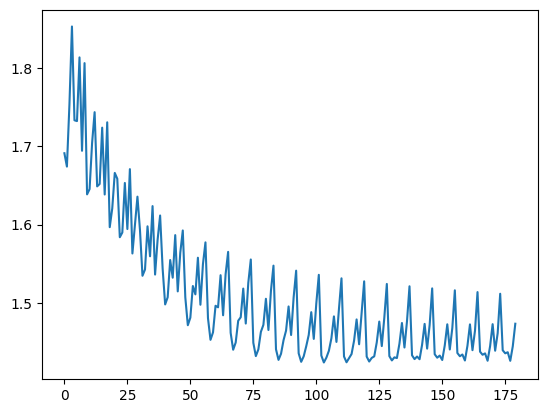

In [5]:
import matplotlib.pyplot as plt

def CNN_forward_prop(image, W1, W2, stride):
    X1 = Conv2D(image, W1, stride)
    X2 = np.dot(X1, W2)
    return X2, X1

def CNN_backward_prop(T, X1, X2, W1, W2, image):
    dZ_dX2 = (X2-T).reshape(3,1)
    dX2_dX1 = (W2.T).reshape(3,1)
    dZ_dW2 = np.dot(X1.T, dZ_dX2)
    dZ_dW1 = Corr2D(image, np.dot(dZ_dX2, dX2_dX1.T), 2)
    return dZ_dW2, dZ_dW1

def CNN_train(images, target, alpha = 5e-6):
    np.random.seed(1)
    W1 = (np.random.rand(3,3)-0.5)
    W2 = (np.random.rand(3)-0.5).reshape(3,1)

    errors = []
    max_epochs = 20
    
    for i in range(max_epochs):
        for image_idx in range(images.shape[0]):
            X0 = images[image_idx]
            X2, X1 = CNN_forward_prop(X0, W1, W2, 2)
            errors.append(np.linalg.norm(X2-target[image_idx]))
            dW2, dW1 = CNN_backward_prop(target[image_idx].reshape(3,1), X1, X2, W1, W2, X0)
            W2 -= alpha*dW2
            W1 -= alpha*dW1

    return W1, W2, errors

W1, W2, errors = CNN_train(image7by7, target, alpha=5e-3)

print(W1)
print(W2)

plt.plot(errors)

In [10]:
from sklearn.metrics import accuracy_score

train_pred = CNN_pred(image7by7, W1, W2, 2, Corr=True)
print("Training Predictions: ")
print(train_pred)
print("Training Accuracy: ")
print(accuracy_score(target, train_pred))
test_pred = CNN_pred(image7by7t, W1, W2, 2, Corr=True)
print('\n')
print("Testing Predictions: ")
print(test_pred)
print("Testing Accuracy: ")
print(accuracy_score(targett, test_pred))

Training Predictions: 
[array([1., 0., 0.]), array([1., 0., 0.]), array([0., 0., 1.]), array([0., 1., 0.]), array([0., 1., 0.]), array([0., 1., 0.]), array([0., 0., 1.]), array([0., 0., 1.]), array([0., 0., 1.])]
Training Accuracy: 
0.8888888888888888


Testing Predictions: 
[array([1., 0., 0.]), array([0., 0., 1.]), array([0., 1., 0.])]
Testing Accuracy: 
1.0
